In [1]:
import pandas as pd
import numpy as np
import folium
import googlemaps

In [2]:
import folium.plugins as plugins

In [3]:
sp = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보1205.csv', encoding='euc-kr')

In [4]:
sp.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202211,1호선,동대문,728,4,10942,1871,8782,6391,14368,...,7946,518,2191,5,206,0,1,0,0,20221203
1,202211,1호선,동묘앞,205,4,3082,1052,3731,4674,6555,...,3580,89,1322,2,332,0,1,0,0,20221203
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,...,13413,2321,2639,2,192,0,0,0,0,20221203
3,202211,1호선,시청,121,0,2050,4369,3391,23225,7286,...,3194,872,850,1,26,0,0,0,0,20221203
4,202211,1호선,신설동,372,15,9256,2278,9260,8707,20784,...,7874,370,2070,1,6,0,0,0,0,20221203


In [5]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55726 entries, 0 to 55725
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           55726 non-null  int64 
 1   호선명           55726 non-null  object
 2   지하철역          55726 non-null  object
 3   04시-05시 승차인원  55726 non-null  int64 
 4   04시-05시 하차인원  55726 non-null  int64 
 5   05시-06시 승차인원  55726 non-null  int64 
 6   05시-06시 하차인원  55726 non-null  int64 
 7   06시-07시 승차인원  55726 non-null  int64 
 8   06시-07시 하차인원  55726 non-null  int64 
 9   07시-08시 승차인원  55726 non-null  int64 
 10  07시-08시 하차인원  55726 non-null  int64 
 11  08시-09시 승차인원  55726 non-null  int64 
 12  08시-09시 하차인원  55726 non-null  int64 
 13  09시-10시 승차인원  55726 non-null  int64 
 14  09시-10시 하차인원  55726 non-null  int64 
 15  10시-11시 승차인원  55726 non-null  int64 
 16  10시-11시 하차인원  55726 non-null  int64 
 17  11시-12시 승차인원  55726 non-null  int64 
 18  11시-12시 하차인원  55726 non-null  int64 
 19  12시-

In [6]:
sorted(list(set(sp['사용월'])))

[201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106,
 202107,
 202108,
 202109,
 202110,
 202111,
 202112,
 202201,
 202202,
 202203,
 202204,
 202205,
 202206,
 202207,
 202208,
 202209,
 202210,
 202211]

In [7]:
sorted(list(set(sp['호선명'])))

['1호선',
 '2호선',
 '3호선',
 '4호선',
 '5호선',
 '6호선',
 '7호선',
 '8호선',
 '9호선',
 '9호선2~3단계',
 '9호선2단계',
 '경강선',
 '경부선',
 '경원선',
 '경의선',
 '경인선',
 '경춘선',
 '공항철도 1호선',
 '과천선',
 '분당선',
 '수인선',
 '신림선',
 '안산선',
 '우이신설선',
 '일산선',
 '장항선',
 '중앙선']

In [9]:
sorted(list(set(sp['지하철역'])))

['4.19민주묘지',
 '가능',
 '가락시장',
 '가산디지털단지',
 '가양',
 '가오리',
 '가좌',
 '가천대',
 '가평',
 '간석',
 '갈매',
 '강남',
 '강남구청',
 '강동',
 '강동구청',
 '강매',
 '강변',
 '강변(동서울터미널)',
 '강일',
 '강촌',
 '개롱',
 '개봉',
 '개포동',
 '개화',
 '개화산',
 '거여',
 '건대입구',
 '검암',
 '경기광주',
 '경마공원',
 '경복궁',
 '경복궁(정부서울청사)',
 '경찰병원',
 '계양',
 '고덕',
 '고려대',
 '고려대(종암)',
 '고색',
 '고속터미널',
 '고잔',
 '곡산',
 '곤지암',
 '공덕',
 '공릉',
 '공릉(서울과학기술대)',
 '공항시장',
 '공항화물청사',
 '과천',
 '관악',
 '관악산(서울대)',
 '광나루',
 '광나루(장신대)',
 '광명',
 '광명사거리',
 '광운대',
 '광화문',
 '광화문(세종문화회관)',
 '광흥창',
 '광흥창(서강)',
 '교대',
 '교대(법원.검찰청)',
 '구로',
 '구로디지털단지',
 '구룡',
 '구리',
 '구반포',
 '구산',
 '구성',
 '구의',
 '구의(광진구청)',
 '구일',
 '구파발',
 '국수',
 '국회의사당',
 '군자',
 '군자(능동)',
 '군포',
 '굴봉산',
 '굴포천',
 '굽은다리',
 '굽은다리(강동구민회관앞)',
 '금곡',
 '금릉',
 '금정',
 '금천구청',
 '금촌',
 '금호',
 '기흥',
 '길동',
 '길음',
 '김유정',
 '김포공항',
 '까치산',
 '까치울',
 '낙성대',
 '낙성대(강감찬)',
 '남구로',
 '남동인더스파크',
 '남부터미널',
 '남부터미널(예술의전당)',
 '남성',
 '남영',
 '남위례',
 '남춘천',
 '남태령',
 '남한산성입구',
 '남한산성입구(성남법원.검찰청)',
 '내방',
 '노들',
 '노량진',
 '노원',
 '녹번',
 '녹사평(용산구청)',

In [10]:
len(list(set(sp['지하철역'])))

588

In [12]:
sp2 = sp[sp['사용월']==202106]

In [15]:
sp2

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
10388,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,...,8211,16,1434,1,1,0,0,0,0,20210703
10389,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,...,2589,4,1348,0,0,0,0,0,0,20210703
10390,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,...,8024,30,637,0,1,0,0,0,0,20210703
10391,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,...,1485,3,92,0,0,0,0,0,0,20210703
10392,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,...,5451,10,449,0,0,0,0,0,0,20210703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10991,202106,중앙선,원덕,47,1,350,7,653,225,882,...,219,1,61,0,0,0,0,0,0,20210703
10992,202106,중앙선,중랑,160,1,6077,564,9670,2216,22839,...,4161,9,273,0,0,0,0,0,0,20210703
10993,202106,중앙선,지평,0,0,0,0,1,0,377,...,0,0,0,0,0,0,0,0,0,20210703
10994,202106,중앙선,팔당,2,1,267,132,722,675,1546,...,251,0,0,0,0,0,0,0,0,20210703


In [18]:
sp3 = sp.drop(columns={'작업일자'})
sp3

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202211,1호선,동대문,728,4,10942,1871,8782,6391,14368,...,4294,7946,518,2191,5,206,0,1,0,0
1,202211,1호선,동묘앞,205,4,3082,1052,3731,4674,6555,...,1230,3580,89,1322,2,332,0,1,0,0
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,...,22735,13413,2321,2639,2,192,0,0,0,0
3,202211,1호선,시청,121,0,2050,4369,3391,23225,7286,...,10081,3194,872,850,1,26,0,0,0,0
4,202211,1호선,신설동,372,15,9256,2278,9260,8707,20784,...,3316,7874,370,2070,1,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55721,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,111,633,3,222,0,0,0,0,0,0
55722,201501,중앙선,원덕,1,0,292,4,415,46,537,...,8,383,3,157,0,0,0,0,0,0
55723,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,1619,6501,86,1617,0,0,0,0,0,0
55724,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,107,336,8,85,0,0,0,0,0,0


In [19]:
import matplotlib.font_manager as fm

In [36]:
font_dirs = ['C:\Windows\Fonts\batang',]

In [37]:
font_files = fm.findSystemFonts(fontpaths=font_dirs)

In [38]:
for font_file in font_files:
    fm.FontManager.addfont(font_file)

In [39]:
sp4 = sp3.groupby(['호선명']).mean().reset_index()

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_17792\383093096.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sp4 = sp3.groupby(['호선명']).mean().reset_index()


In [25]:
sp4

,호선명,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,1호선,201852.757895,387.058947,10.726316,6548.967368,3490.548421,7886.256842,16814.003158,17618.616842,43320.985263,...,13698.867368,8625.440000,1270.974737,2621.490526,19.151579,85.331579,0.231579,2.321053,0.018947,0.000000
1,2호선,201852.757895,266.695789,3.988842,10129.628632,2830.338105,17849.577263,16155.185474,47084.019158,39494.736000,...,18181.019368,21545.662526,2516.798526,6249.613684,16.533474,364.577895,1.879368,6.115368,0.112000,0.666526
2,3호선,201852.757895,54.812074,2.628483,4238.888545,1106.868731,10057.988235,10219.607740,27291.047059,24148.682043,...,6122.273994,9300.358204,676.742415,2601.113313,4.168111,91.764396,0.121672,1.349226,0.002477,0.002477
3,4호선,201852.757895,150.714575,5.586235,7884.042915,1423.250202,17839.877733,11213.673279,45377.591093,25048.088664,...,10622.414980,16829.378947,1329.565992,4609.717814,7.014170,175.448178,0.129960,1.938462,0.033603,0.056680
4,5호선,201859.754835,13.515310,0.297744,4620.430097,977.027599,10562.373691,6853.535455,30842.632151,16561.161362,...,3811.623892,8810.034649,431.711926,2545.560234,3.655318,80.462530,0.023771,1.201450,0.000403,0.000403
5,6호선,201855.181020,40.739166,0.718047,4203.691168,919.407844,8255.092430,4390.496434,22679.742457,9753.294844,...,4688.666484,8401.448162,616.631651,2424.457488,3.488481,84.642348,0.074328,0.835162,0.000549,0.000000
6,7호선,201850.024126,41.726290,0.705491,6642.764767,1425.355241,13369.159110,7456.791805,35989.738769,16944.198211,...,5475.788270,11121.785150,766.652246,3500.753328,3.584027,145.609817,0.026830,1.278910,0.001872,0.000208
7,8호선,201855.305470,11.126613,0.274124,4885.052858,1356.254456,10127.189305,6752.244622,27775.807621,12676.794714,...,3058.564229,8071.007376,431.268593,2250.776275,3.147511,140.086048,0.017210,1.145667,0.009219,0.009219
8,9호선,201852.757895,17.526737,0.242526,3888.055158,970.813053,8778.241263,6793.204211,24064.605895,17190.706947,...,4747.406316,8481.938526,643.490947,2294.502316,3.073263,89.704421,0.022316,0.466526,0.008421,0.003368
9,9호선2~3단계,202048.166667,6.501603,0.259615,1594.748397,480.048077,4392.354167,3751.717949,11536.274038,8742.538462,...,2003.301282,3719.275641,221.048077,707.363782,2.429487,26.339744,0.011218,0.203526,0.001603,0.000000


In [40]:
sp5 = sp4.mean(axis = 1).sort_values(ascending=False)

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_17792\3851928520.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sp5 = sp4.mean(axis = 1).sort_values(ascending=False)


In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [42]:
plt.rc('font', family = 'batang')

In [43]:
plt.rcParams['axes.unicode_minus']=False

<AxesSubplot: >

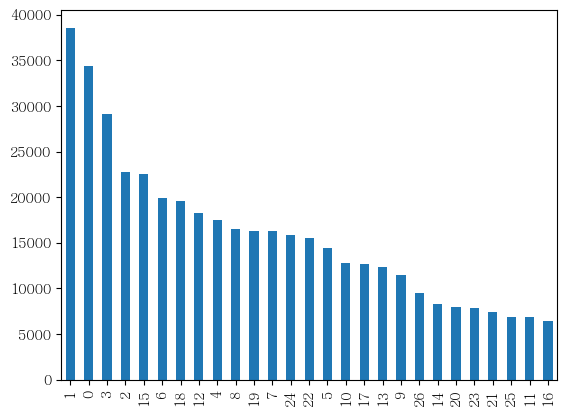

In [44]:
sp5.plot(kind=('bar'))

In [45]:
plt.show()